<a href="https://colab.research.google.com/github/KaggleUser93/TensorFlow_AI/blob/master/TF_Proj4_NumberImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

#class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [43]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.3521 - acc: 0.9204
Epoch 2/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.1125 - acc: 0.9660
Epoch 3/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0811 - acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0644 - acc: 0.9799
Epoch 5/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0533 - acc: 0.9830
Epoch 6/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0445 - acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0360 - acc: 0.9879
Epoch 8/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0331 - acc: 0.9888
Epoch 9/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0282 - acc: 0.9904
Epoch 10/10
60000/60000 [==============================] - 14s 2

In [44]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0852 - acc: 0.9784


[0.0851922125600744, 0.9784]

In [45]:
predictions = model.predict(x_test)
predictions[0]

array([1.2736971e-10, 2.8637503e-12, 8.9933332e-09, 4.8576262e-06,
       1.1560306e-14, 4.7657354e-11, 2.3974534e-16, 9.9999499e-01,
       8.7874250e-11, 7.8609794e-08], dtype=float32)

In [46]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

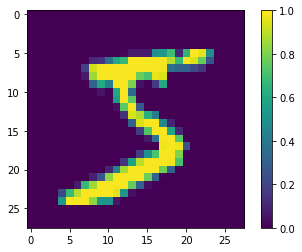

In [48]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

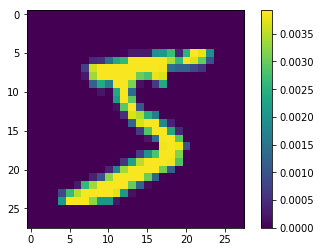

In [49]:
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

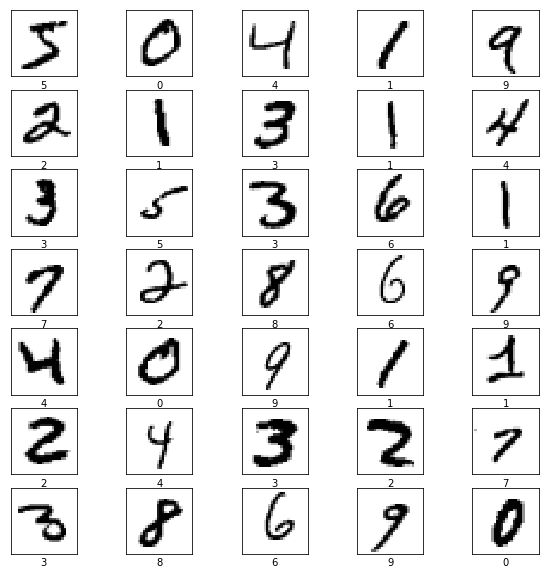

In [50]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

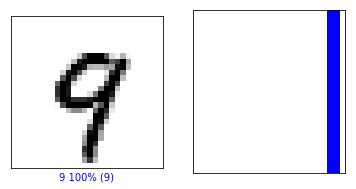

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

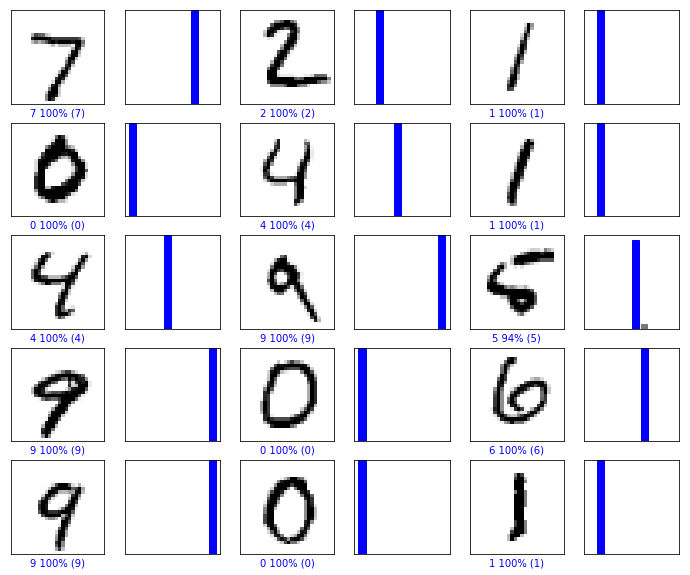

In [53]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()